In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Triple Point of Benzene
This problem is Example 23.1 from *Physical Chemistry - A Molecular Approach* by McQuarrie and Simon.

Experimentally determined vapor pressures of benzene have been found. For liquid benzene over the temperature range $273 < T < 300$ the vapor pressure in Torr is

$$\ln(P) = \frac{-4110}{T} + 18.33$$

The vapor pressure of solid benzene over the temperature range $250 < T < 280$ is

$$\ln(P) = \frac{-5319}{T} + 22.67$$

Plot pressure vs. temperature (**not $\ln(P)$)** to visually determine the triple point, where solid, liquid, and gas coexist with equal free energies.
* Create an array for the solid-gas temperature range based on how the liquid-gas temperature array is created.
* Enter the code for calculating the vapor pressures.

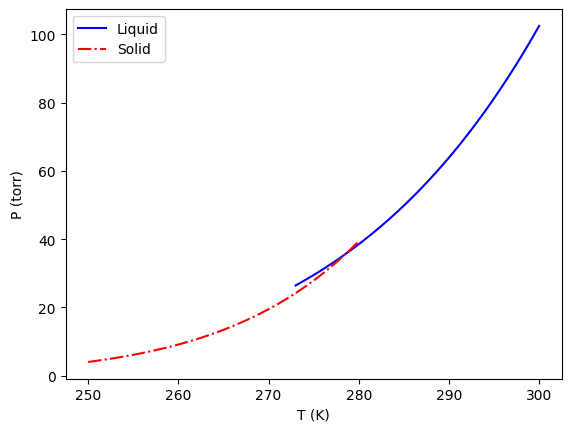

In [3]:
TL = np.linspace(273, 300, 100) #temperature in K for liquid-gas vapor pressure
TS =  np.linspace(250, 280, 100)#temperature in K for solid-gas vapor pressure
PL = np.exp(-4110/TL + 18.33)#pressure as a function of TL for liquid-gas vapor pressure
PS = np.exp(-5319/TS + 22.67)#pressure as a function of TL for solid-gas vapor pressure

plt.plot(TL, PL, '-b', label='Liquid')
plt.plot(TS, PS, '-.r', label='Solid')
plt.xlabel('T (K)')
plt.ylabel('P (torr)')
plt.legend()
plt.show()

## Numerical Solution
We can solve for where the two vapor pressures are equal to find the triple point. Algebraically, we set the two pressure equations equal to one another and solve for $T$.

$$\frac{-4110}{T} + 18.33 = \frac{-5319}{T} + 22.67$$

You should solve this by hand first.

Using Jupyter, we can use a library called `sympy`. We need to import the following

```python
from sympy.solvers import solve
from sympy import Symbol
```

The first import is a numerical equation solver. The second import allows us to create symbols that represent variables to be solved. In this case, we want to solve for $T$, but we will call it `x`. Defining a symbol is done like this

```python
x = Symbol('x')
```

Then, we solve the equation we have above, but the trick is to rearrange it so that everything is on the left hand side, and the right hand side is zero. Do this rearrangement, and then, insert it into the `solve` line below.

```python
solve(LHS equation, x)
```

In [16]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(-4110/x+5319/x+18.33-22.67,x)

[278.571428571429]

# Problem 5.24 Schroeder
Go through the arithmetic to verify that diamond becomes more stable than graphite at approximately 15 kbar.

Energies are relative. Therefore, we can set the graphite $G_g = 0$ at atmospheric pressure. See Figure 5.15 in the text. The diamond Gibbs energy is $G_d = 2900$ Joules. Assuming constant temperature and number of carbon atoms,

$$\left(\frac{\partial G}{\partial P}\right)_{T,N}=V$$

or the slope of the $G$ vs. $P$ graph is volume. At a particular pressure, each carbon structure will have a Gibbs energy

$$G = V P + G_o$$

and the difference in Gibbs energy is zero when the two structures are equally likely. This occurs when

$$\begin{align}
\Delta G &= 0\\
G_g-G_d &= 0\\
\left(V_g P + 0\right) - \left(V_d P + 2900\right) &= 0\\
\end{align}$$

From the back of the book, $V_g = 5.3~\text{cm}^3$ and $V_d = 3.42~\text{cm}^3$.

$$P = \frac{2900}{V_g-V_d}$$

* Enter this calculation below inside the print statement.

In [5]:
print(2900/(5.3*1/100**3 - 3.42/100**3)/1e5) #divide by 1e5 to get bar

15425.531914893616


# Problem 5.27 Shroeder
Graphite is more compressible than diamond.
* Taking compressibility into account, would you expect the transition from graphite to diamond to occur at higher or lower pressure than predicted above?
* The isothermal compressibility of graphite is about $\kappa_T = 3 \times 10^{-6}~\text{bar}^{-1}$, while that of diamond is more than ten times less and hence negligible in comparison. (Isothermal compressibility is the fractional reduction in volume per unit increase in pressure, as defined in problem 1.46.) Use this information to make a revised estimate of the pressure at which diamond becomes more stable than graphite (at room temperature).

Compressibility is defined as

$$\kappa_T = -\frac{1}{V}\left(\frac{\partial V}{\partial P}\right)_T$$

which we will assume is constant with presssure. We can rearrange to see

$$\left(\frac{\partial V}{\partial P}\right)_T = -V\kappa_T$$

Using this, we can write an equation to describe volume changes as a function of pressure.

$$V(P) = V_o - \frac{\partial V}{\partial P}\cdot P = V_o - \kappa_T VP$$

Recall that the Gibbs energy changes with pressure

$$\left(\frac{\partial G}{\partial P}\right)_{T,N} = V$$

or

$$\left(\frac{\partial G}{\partial P}\right)_{T,N} = V_o - \kappa_T VP$$

We can rearrange and integrate this equation

$$\begin{align}
dG &= \left(V_o - \kappa_T VP\right) dP\\
\int dG &= \int \left(V_o - \kappa_T VP\right) dP\\
G &= V_o P - \frac{1}{2} \kappa_T VP^2
\end{align}$$

Since the last term is negative, the slope of graphite's Gibbs energy will be smaller. Looking at figure 5.15, we see that this will push the crossing point to larger pressures.

We can now solve for the pressure where the two Gibbs energies are equal, similar to problem 5.24. However, we now have a quadratic. We can use the `sympy` solver again.

In [17]:
solve(x*5.3/100**3 - 0.5*3e-11*5.3/100**3*x**2 - 3.42/100**3*x-2900,x)

[1658929675.30587, 21988869066.8325]

In [18]:
solve(x*5.3/100**3 - 0.5*3e-11*5.3/100**3*x**2 - 3.42/100**3*x+2900,x)

[-1453245794.91262, 25101044537.0510]

The second solution (higher pressure) is where the quadratic turns over and comes back down. This is an invalid solution.

Let's plot the Gibbs vs. pressure to visualize the solution.
* Enter the code for calculating the Gibbs energies of graphite and diamond.

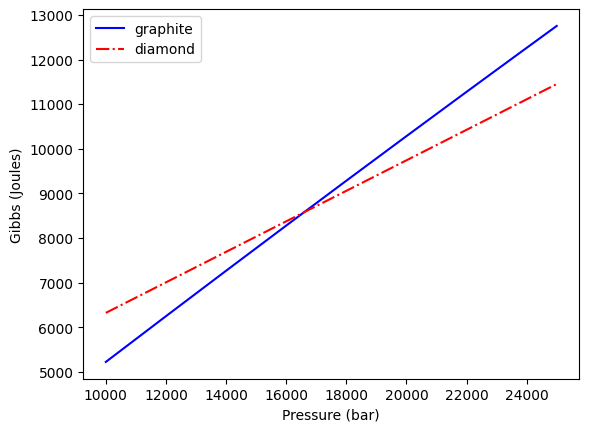

In [22]:
P = np.linspace(10e8, 25e8, 1000)
Gg = P*5.3/100**3 - 0.5*3e-11*5.3/100**3*P**2
Gd = P*3.42/100**3 + 2900
plt.plot(P/1e5, Gg, '-b', label='graphite')
plt.plot(P/1e5, Gd, '-.r', label='diamond')
plt.xlabel('Pressure (bar)')
plt.ylabel ('Gibbs (Joules)')
plt.legend()
plt.show()

## Temperature Effects
How does temperature affect the formation of diamond? According to the table at the back of the text $\Delta H_g = 0$ kJ/mol,  $\Delta H_d = 1.895$ kJ/mol,  $S_g = 0.00574$ kJ/mol K, and  $S_d = 0.00238$ kJ/mol K. We can plot $G_g$, $G_d$, and $\Delta G= G_g-G_d$. According to https://en.wikipedia.org/wiki/Geothermal_gradient, the temperature at the depths diamond is formed is approximately 1000C. So, we'll make a temperature array from room temperature to 1000C and use the text data that is for 298 K and 1 atm.

-6.172280000000001


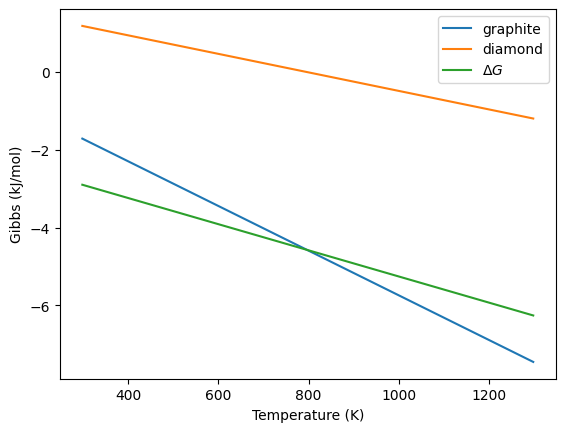

In [10]:
T = np.linspace(298, 1298, 1001)
Gg = 0 - 0.00574*T
Gd = 1.895 - T*0.00238
DG = Gg - Gd
print(0 - 0.00574*1273 - 1.895 + 1273*0.00238)

plt.plot(T, Gg, label='graphite')
plt.plot(T, Gd, label='diamond')
plt.plot(T, DG, label=r'$\Delta G$')
plt.xlabel('Temperature (K)')
plt.ylabel('Gibbs (kJ/mol)')
plt.legend()
plt.show()

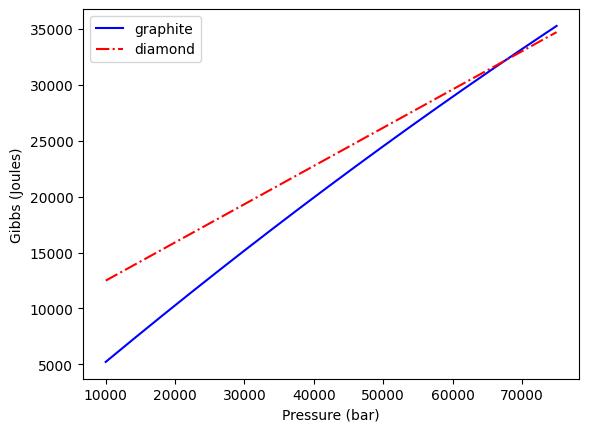

In [15]:
P = np.linspace(10e8, 75e8, 1000)
Gg = P*5.3/100**3 - 0.5*3e-11*5.3/100**3*P**2
Gd = P*3.42/100**3 + 2900 + 6172
plt.plot(P/1e5, Gg, '-b', label='graphite')
plt.plot(P/1e5, Gd, '-.r', label='diamond')
plt.xlabel('Pressure (bar)')
plt.ylabel ('Gibbs (Joules)')
plt.legend()
plt.show()